In [1]:
# Import useful modules
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import time 

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive',  force_remount=False)

Mounted at /content/drive


In [3]:
# Read review data into a dataframe
df=pd.read_csv('/content/drive/MyDrive/Data/reviews_and_metadata_all_version1[1].csv', index_col = 0)

In [4]:
df.head(3)

,username,rating,date_of_review,review_content,rounded_rating,doctorID,Business ID,Name,Business Category,URL,snippet text,Address,City,State code,zip code,clamed,closed,latitude,longitude,phone
0,Gregory P.,5.0,7/13/2021,Best guy to check what's going on up there!!! ...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
1,Corvetta M.,1.0,10/14/2022,This review does not reflect what I think of t...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09
2,Micky B.,1.0,8/3/2022,I have been having issues with my liver/stomac...,2.7,101,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,",https://www.yelp.com/biz/chuang-t-hung-md-upland,Was referred to Dr. Hung by my auntie who has ...,"629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,1,0,34.101295,-117.633995,9.099853e+09


###Contraction Expenasion for aggreated reviews 

In [5]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 3.8 MB/s 
     |████████████████████████████████| 110 kB 44.9 MB/s 


In [6]:
# Contraction expansion function 
def contraction_expansion(input_string):
  expanded_word = []
  for word in input_string.split():
    expanded_word.append(contractions.fix(word))
  
  concatenate_review = ' '.join(expanded_word)
  return concatenate_review

In [7]:
#import important libraries for sentiment analysis
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [8]:
df.columns

Index(['username', 'rating', 'date_of_review', 'review_content',
       'rounded_rating', 'doctorID', 'Business ID ', 'Name',
       'Business Category', 'URL', 'snippet text', 'Address', 'City',
       'State code', 'zip code', 'clamed', 'closed', 'latitude', 'longitude',
       'phone'],
      dtype='object')

In [9]:
#aggrregate the reviews for each business 
df_agg=df.groupby(['Business ID ','Name','Business Category','Address','City','State code','zip code','rounded_rating'], as_index=False)['review_content'].apply (lambda x: ' '.join(x))

In [10]:
df_agg.head(3)

,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content
0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","13800 Arizona StSte 200Westminster, CA 92683",Westminster,CA,92683.0,5.0,A great Home health service located right in t...
1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","2781 Rubidoux BlvdRiverside, CA 92509",Riverside,CA,92509.0,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...
2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","23318 Olivewood Plaza DrMoreno Valley, CA 92553",Moreno Valley,CA,92553.0,4.5,Doctor Brysk and her staff is great. I have r...


In [11]:
#expand the contreaction on the review content
%time df_agg['Review_expanded'] = df_agg['review_content'].apply(contraction_expansion)
df_agg['Review_expanded'].head(3)

CPU times: user 27.6 s, sys: 113 ms, total: 27.8 s
Wall time: 34 s


0    A great Home health service located right in t...
1    4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...
2    Doctor Brysk and her staff is great. I have re...
Name: Review_expanded, dtype: object

###Sentiment Analysis:

*  Polarity score 
*  Subjectivity score
*  Ccompound score






#### Polarity score

In [12]:
%time df_agg['polarity'] = df_agg['Review_expanded'].apply(lambda row: TextBlob (row).sentiment[0])

df_agg.head(3)

CPU times: user 43.4 s, sys: 186 ms, total: 43.6 s
Wall time: 43.8 s


,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content,Review_expanded,polarity
0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","13800 Arizona StSte 200Westminster, CA 92683",Westminster,CA,92683.0,5.0,A great Home health service located right in t...,A great Home health service located right in t...,0.364055
1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","2781 Rubidoux BlvdRiverside, CA 92509",Riverside,CA,92509.0,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,0.209013
2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","23318 Olivewood Plaza DrMoreno Valley, CA 92553",Moreno Valley,CA,92553.0,4.5,Doctor Brysk and her staff is great. I have r...,Doctor Brysk and her staff is great. I have re...,0.267169


#### Subjectivity score

In [13]:
df_agg['subjectivity'] = df_agg['Review_expanded'].apply(lambda row: TextBlob (row).sentiment[1])

df_agg.head(3)

,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content,Review_expanded,polarity,subjectivity
0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","13800 Arizona StSte 200Westminster, CA 92683",Westminster,CA,92683.0,5.0,A great Home health service located right in t...,A great Home health service located right in t...,0.364055,0.584335
1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","2781 Rubidoux BlvdRiverside, CA 92509",Riverside,CA,92509.0,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,0.209013,0.530690
2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","23318 Olivewood Plaza DrMoreno Valley, CA 92553",Moreno Valley,CA,92553.0,4.5,Doctor Brysk and her staff is great. I have r...,Doctor Brysk and her staff is great. I have re...,0.267169,0.556652


#### Compound score

In [14]:
%time df_agg['NLTK_Compound'] = df_agg['Review_expanded'].apply(lambda row: sia.polarity_scores(row)['compound'])
df_agg.head(3)

CPU times: user 4min 36s, sys: 1.21 s, total: 4min 38s
Wall time: 4min 39s


,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content,Review_expanded,polarity,subjectivity,NLTK_Compound
0,24-7-care-at-home-westminster-2,24/7 Care At Home,"Podiatristspodiatrists, Home Health Carehomehe...","13800 Arizona StSte 200Westminster, CA 92683",Westminster,CA,92683.0,5.0,A great Home health service located right in t...,A great Home health service located right in t...,0.364055,0.584335,0.9998
1,4-ever-green-collective-riverside,4 Ever Green Collective,"Medical Centersmedcenters, Cannabis Clinicscan...","2781 Rubidoux BlvdRiverside, CA 92509",Riverside,CA,92509.0,5.0,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,4 EVER GREEN COLLECTIVE 2781 Rubidoux Blvd. Ri...,0.209013,0.530690,0.9994
2,a-doctors-weight-loss-clinic-moreno-valley-2,Doctor's Weight Loss Clinic,"Doctorsphysicians,","23318 Olivewood Plaza DrMoreno Valley, CA 92553",Moreno Valley,CA,92553.0,4.5,Doctor Brysk and her staff is great. I have r...,Doctor Brysk and her staff is great. I have re...,0.267169,0.556652,0.9993


In [15]:
df_agg.sample(30)

,Business ID,Name,Business Category,Address,City,State code,zip code,rounded_rating,review_content,Review_expanded,polarity,subjectivity,NLTK_Compound
1243,lacera-jacquelyn-md-corona,Lacera Jacquelyn MD,"Doctorsphysicians,","830 Magnolia AveCorona, CA 92879",Corona,CA,92879.0,2.0,I absolutely love Dr. Lacera!!! I've been a pa...,I absolutely love Dr. Lacera!!! I have been a ...,0.187592,0.637255,0.6179
441,chuang-t-hung-md-upland,Chuang T. Hung MD,"Gastroenterologistgastroenterologist,","629 N 13th AveUpland, CA 91786",Upland,CA,91786.0,2.7,Best guy to check what's going on up there!!! ...,Best guy to check what is going on up there!!!...,0.116181,0.518414,0.9999
2356,veterans-affairs-dept-of-colton,Veterans Affairs Dept of,"Hospitalshospitals,","11201 BentonColton, CA 92324",Colton,CA,92324.0,1.0,I can't begin to go through what I went throug...,I cannot begin to go through what I went throu...,-0.115066,0.438635,-0.9904
1931,rizzo-a-nicholas-md-lake-havasu-city,"Rizzo A Nicholas, MD","Surgeonssurgeons,","1972 Mesquite AveLake Havasu City, AZ 86403",Lake Havasu City,AZ,86403.0,5.0,"Great person who does superior surgery, OB / G...","Great person who does superior surgery, OB / G...",0.803333,0.810000,0.9286
644,dr-martin-rocha-pediatrician-lake-arrowhead,Dr. Martin Rocha Pediatrician,"Doctorsphysicians,","251 N Hwy 173Lake Arrowhead, CA 92352",Lake Arrowhead,CA,92352.0,4.3,I'm new to the area and was recommended this p...,I am new to the area and was recommended this ...,0.248291,0.574636,0.9990
528,cullins-chiropractic-clinic-hemet,Cullins Chiropractic Clinic,"Sports Medicinesportsmed, Chiropractorschiropr...","2940 W Florida AveSte BHemet, CA 92545",Hemet,CA,92545.0,4.0,All the Chiropractor's have been great! I walk...,All the Chiropractor's have been great! I walk...,0.264464,0.439885,0.9812
2100,southern-california-bone-and-joint-clinic-appl...,Southern California Bone and Joint Clinic,"Sports Medicinesportsmed, Orthopedistsorthoped...","16008 Kamana RdSte 100Apple Valley, CA 92307",Apple Valley,CA,92307.0,2.9,just had knee surgery with Dr. Liu. Awesome re...,just had knee surgery with Dr. Liu. Awesome re...,0.061561,0.446400,-0.9812
910,healthcare-imaging-center-day-street-riverside,Healthcare Imaging Center Day Street,"Radiologistsradiologists, Diagnostic Imagingdi...","6485 Day StSte 101Riverside, CA 92507",Riverside,CA,92507.0,2.3,I came with my friend for her ultrasound and X...,I came with my friend for her ultrasound and X...,0.079244,0.516257,0.9977
1887,richard-chenik-indian-wells,Richard Chenik,"Psychiatristspsychiatrists,","74785 US Highway 111Indian Wells, CA 92210",Indian Wells,CA,92210.0,2.0,I never got to see him again after my first ap...,I never got to see him again after my first ap...,0.040076,0.549217,-0.9986
10,aarestad-karen-md-riverside,Aarestad Karen MD,"Doctorsphysicians,","3660 Arlington AveRiverside, CA 92506",Riverside,CA,92506.0,5.0,It took some time to get my first appointment ...,It took some time to get my first appointment ...,0.306250,0.515278,0.9743


In [16]:
# save the result
df_agg.to_csv('/content/drive/MyDrive/Colab Notebooks/Mydata/SentimentAnalysis.csv')

Does the sentiment analysis result reflect the business review ratings?
We need to look at polarity score to address this question. 
•	By looking at the polarity in this dataset, we can conclude that for some businesses, the polarity score does not always truly reflect the business review rating, which is a rounded rating in this case. To illustrate, Internal Medicineinternalmed, Family Practicef this business has a polarity score of -0.079907 and a rounding rating of 1.2. However, Yucaipa Physical Therapy has a rating score of 5, which is the highest, and its review polarity score is 0.247667. Other businesses such as of. The Moon Medicine has a polarity score of 1.000000 and a rating of 5. So, it differs if we assess the alignment based on the value or the sign of the score. 


In [ ]:
df_agg[['rounded_rating', 'polarity']].corr()

,rounded_rating,polarity
rounded_rating,1.000000,0.767081
polarity,0.767081,1.000000


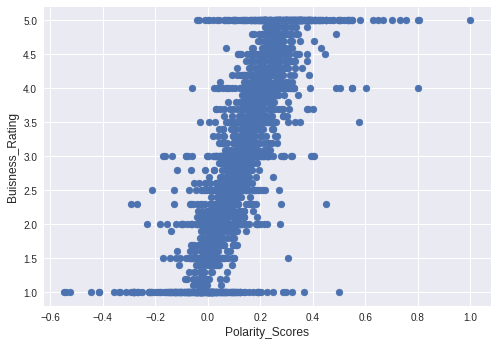

In [ ]:
plt.style.use('seaborn')
plt.scatter(x='polarity',y='rounded_rating',data=df_agg,cmap='rainbow')
plt.xlabel('Polarity_Scores', fontsize=12)
plt.ylabel('Buisness_Rating', fontsize=12)
plt.savefig('corr_scatter_map')
plt.show()

In [ ]:
#sentiment analysis result as an excel file 
df_agg.to_excel('/content/drive/MyDrive/Data/sentiment_analysis.xlsx')